# Importe de los datos de github

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Normalizando los datos

In [9]:
# Lista de columnas anidadas
nested_cols = ['customer', 'phone', 'internet', 'account']

# Normalizar y concatenar en un solo paso
df = pd.concat(
    [df.drop(columns=nested_cols)] +
    [pd.json_normalize(df[col]) for col in nested_cols],
    axis=1
)

# Verificar
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Buscando valores ausentes

In [18]:
df.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [16]:
(df['Churn'] == '').sum()


np.int64(224)

In [19]:
(df['Charges.Total'] == '').sum()


np.int64(0)

In [21]:
df['Churn'] = df['Churn'].replace('', np.nan)

(df['Churn'] == '').sum()


np.int64(0)

In [24]:
df['Charges.Total'] = df['Charges.Total'].replace('', np.nan)

(df['Charges.Total'] == '').sum()

np.int64(0)

In [25]:
df.isnull().sum()


,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


# Eliminando las filas con los valores NAN

In [27]:
df = df.dropna(subset=['Churn'])

df[['Churn']].isnull().sum()

,0
Churn,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

#Cambio de tipo de datos

In [41]:
# Conversión de tipos
# Replace empty strings with NaN before converting to float
df['Charges.Total'] = df['Charges.Total'].replace('', np.nan)

conversiones = {
    'Charges.Total': np.float64,
    'customerID': str,
    'gender': str,
    'InternetService': str,
    'Contract': str,
    'PaymentMethod': str
}
df = df.astype(conversiones)

# Booleanos (Yes/No → True/False)
columnas_bool = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

# Categóricas
columnas_categoricas = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


In [42]:
df.duplicated().sum()

np.int64(0)

#Análisis descriptivo

In [44]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [47]:
Categorias = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
Categorias

['customerID',
 'Churn',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [49]:
for col in Categorias:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(porcentaje.round(2))



--- Porcentaje de evasión por customerID ---
Churn       False  True 
customerID              
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7043 rows x 2 columns]

--- Porcentaje de evasión por Churn ---
Churn  False  True 
Churn              
False  100.0    0.0
True     0.0  100.0

--- Porcentaje de evasión por gender ---
Churn   False  True 
gender              
Female  73.08  26.92
Male    73.84  26.16

--- Porcentaje de evasión por Partner ---
Churn    False  True 
Partner              
False    67.04  32.96
True     80.34  19.66

--- Porcentaje de evasión por Dependents ---
Churn       False  True 
Dependents              
False       68.72  31.28
True        84.55  15.45

--- Porcentaje de evasión por PhoneService ---
Churn         False  True 
Phone

# Tipos de cancelaciones

/tmp/ipython-input-476434941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-476434941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-476434941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-476434941.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-476434941.py:159: FutureWarning: 

Passin

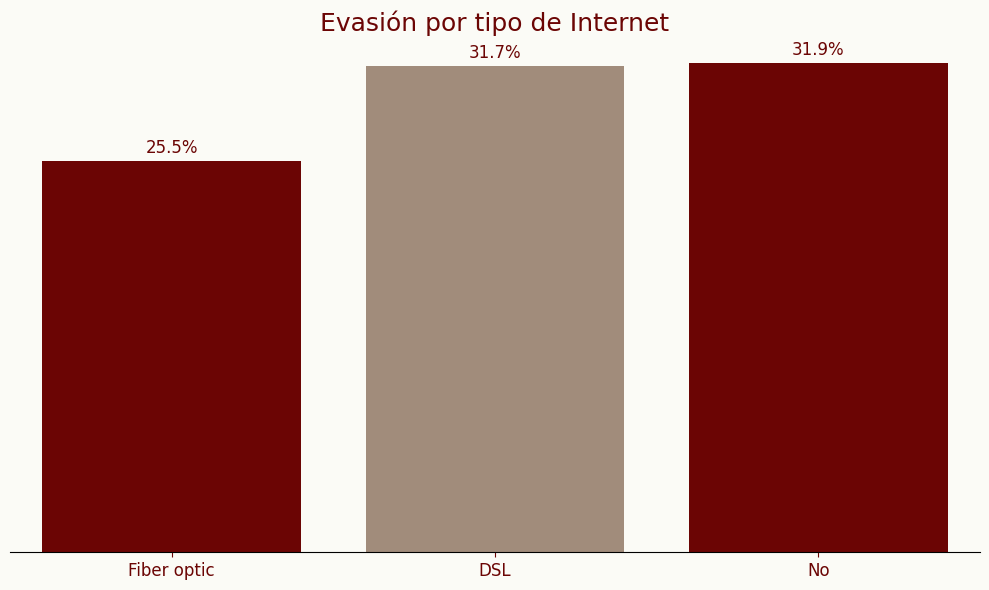

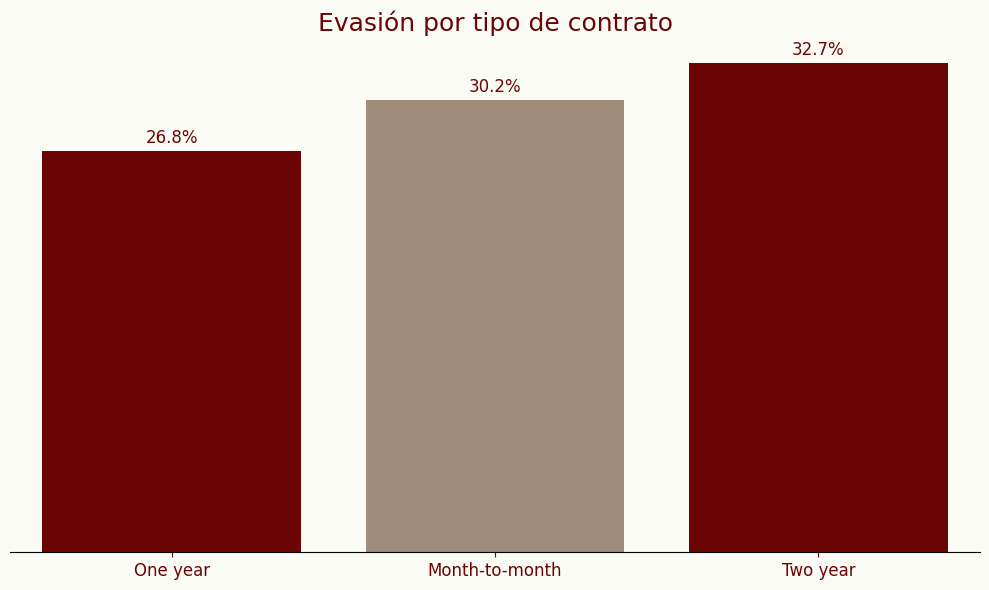

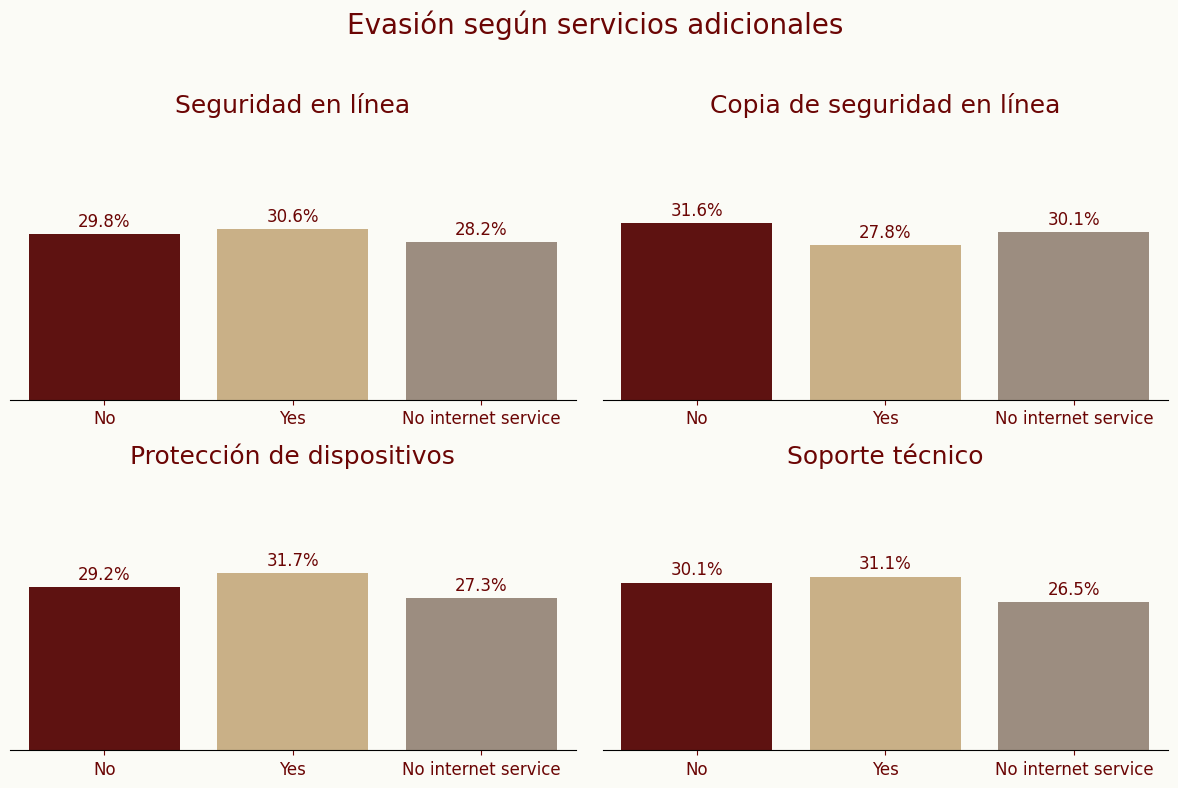

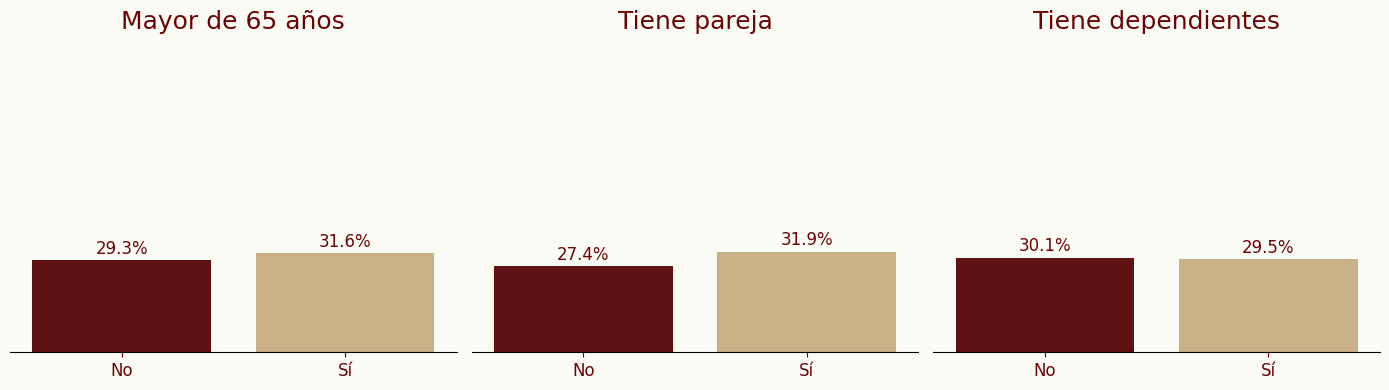

In [56]:
# Definimos los colores en constantes globales
VINO_TINTO = '#6B0504'
GRIS_ARENA = '#A18C7B'
DORADO_QUEMADO = '#D4B27C'
FONDO_CREMA = '#FBFBF6'

# Color principal y secundario para alternar barras
COLOR_PRINCIPAL = VINO_TINTO
COLOR_SECUNDARIO = GRIS_ARENA
# Color para destacar puntos clave
COLOR_TEXTO_Y_TITULOS = VINO_TINTO

# --- Generación de datos de ejemplo (Reemplaza esto con tu DataFrame real `df`) ---
np.random.seed(42)
n_muestras = 1000
df = pd.DataFrame({
    'customerID': range(1000),
    'gender': np.random.choice(['Male', 'Female'], size=n_muestras),
    'Partner': np.random.choice(['Yes', 'No'], size=n_muestras),
    'Dependents': np.random.choice(['Yes', 'No'], size=n_muestras),
    'PhoneService': np.random.choice(['Yes', 'No'], size=n_muestras),
    'MultipleLines': np.random.choice(['No', 'Yes', 'No phone service'], size=n_muestras),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_muestras),
    'OnlineSecurity': np.random.choice(['No', 'Yes', 'No internet service'], size=n_muestras, p=[0.4, 0.4, 0.2]),
    'OnlineBackup': np.random.choice(['No', 'Yes', 'No internet service'], size=n_muestras, p=[0.4, 0.4, 0.2]),
    'DeviceProtection': np.random.choice(['No', 'Yes', 'No internet service'], size=n_muestras, p=[0.4, 0.4, 0.2]),
    'TechSupport': np.random.choice(['No', 'Yes', 'No internet service'], size=n_muestras, p=[0.4, 0.4, 0.2]),
    'StreamingTV': np.random.choice(['No', 'Yes', 'No internet service'], size=n_muestras, p=[0.4, 0.4, 0.2]),
    'StreamingMovies': np.random.choice(['No', 'Yes', 'No internet service'], size=n_muestras, p=[0.4, 0.4, 0.2]),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n_muestras),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], size=n_muestras),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], size=n_muestras),
    'SeniorCitizen': np.random.choice(['Yes', 'No'], size=n_muestras, p=[0.2, 0.8]), # Corregido para usar 'Yes'/'No'
    'Churn': np.random.choice(['Yes', 'No'], size=n_muestras, p=[0.3, 0.7])
})

# Transformar las variables necesarias para el análisis
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
# --- Fin de la generación de datos de ejemplo ---

def configurar_ejes_y_grafico(ax, titulo, xlabel='', xtick_labels=None, ylim=None):
    """Función genérica para configurar la apariencia de un gráfico de barras."""
    ax.set_title(titulo, fontsize=18, color=COLOR_TEXTO_Y_TITULOS)
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)
    ax.set_xlabel(xlabel)
    ax.tick_params(axis='x', labelsize=12, colors=COLOR_TEXTO_Y_TITULOS)

    if xtick_labels:
        ax.set_xticklabels(xtick_labels)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_facecolor(FONDO_CREMA)

    if ylim:
        ax.set_ylim(ylim)

def crear_grafica_barras(df, x_col, y_col, titulo, order=None, xtick_labels=None, alternar_colores=True, ylim=None, palette=None):
    """
    Crea un gráfico de barras con personalización visual.

    Args:
        df (pd.DataFrame): DataFrame de datos.
        x_col (str): Columna para el eje X.
        y_col (str): Columna para el eje Y (porcentaje de evasión).
        titulo (str): Título del gráfico.
        order (list): Orden de las categorías en el eje X.
        xtick_labels (list): Etiquetas personalizadas para el eje X.
        alternar_colores (bool): Si es True, alterna entre COLOR_PRINCIPAL y COLOR_SECUNDARIO.
        ylim (tuple): Límites del eje Y.
        palette (list): Paleta de colores a usar, si no se alterna.
    """
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=x_col,
        y=y_col,
        data=df,
        estimator=lambda x: x.mean() * 100,
        order=order,
        errorbar=None,
        palette=palette if palette else None
    )

    if alternar_colores and not palette:
        for i, bar in enumerate(ax.patches):
            bar.set_facecolor(COLOR_PRINCIPAL if i % 2 == 0 else COLOR_SECUNDARIO)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=COLOR_TEXTO_Y_TITULOS, fontsize=12)

    configurar_ejes_y_grafico(ax, titulo, xtick_labels=xtick_labels, ylim=ylim)
    plt.gcf().set_facecolor(FONDO_CREMA)
    plt.tight_layout()
    return plt

def graficas_distribucion_evasion(df):
    """
    Genera todas las gráficas de evasión usando funciones optimizadas.
    """
    # Gráfica de evasión por tipo de Internet
    orden_internet = df.groupby('InternetService')['Churn'].mean().sort_values().index
    crear_grafica_barras(df, 'InternetService', 'Churn', 'Evasión por tipo de Internet', order=orden_internet)

    # Gráfica de evasión por tipo de contrato
    orden_contrato = df.groupby('Contract')['Churn'].mean().sort_values().index
    crear_grafica_barras(df, 'Contract', 'Churn', 'Evasión por tipo de contrato', order=orden_contrato)

    # Gráficas de servicios adicionales
    servicios = [
        ('OnlineSecurity', 'Seguridad en línea'),
        ('OnlineBackup', 'Copia de seguridad en línea'),
        ('DeviceProtection', 'Protección de dispositivos'),
        ('TechSupport', 'Soporte técnico')
    ]
    orden_servicio = ['No', 'Yes', 'No internet service']

    fig, axs = plt.subplots(2, 2, figsize=(12, 8), facecolor=FONDO_CREMA)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    fig.suptitle('Evasión según servicios adicionales', fontsize=20, color=COLOR_TEXTO_Y_TITULOS)

    for i, (servicio, titulo) in enumerate(servicios):
        ax = axs[i // 2, i % 2]
        sns.barplot(
            x=servicio,
            y='Churn',
            data=df,
            estimator=lambda x: x.mean() * 100,
            order=orden_servicio,
            errorbar=None,
            ax=ax,
            palette=[COLOR_PRINCIPAL, DORADO_QUEMADO, GRIS_ARENA]
        )

        configurar_ejes_y_grafico(ax, titulo, ylim=(0, 50))

        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=COLOR_TEXTO_Y_TITULOS, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Gráficas de variables binarias
    variables_binarias = ['SeniorCitizen', 'Partner', 'Dependents']
    titulos_binarios = ['Mayor de 65 años', 'Tiene pareja', 'Tiene dependientes']

    fig, axs = plt.subplots(1, 3, figsize=(14, 4), facecolor=FONDO_CREMA)

    for i, var in enumerate(variables_binarias):
        ax = axs[i]
        data = df.groupby(var)['Churn'].mean() * 100

        # El orden de la paleta debe coincidir con el orden de las categorías de 'var'
        if var == 'SeniorCitizen':
            orden_categorias = ['No', 'Yes']
            ax = sns.barplot(x=data.index, y=data.values, ax=ax, order=orden_categorias, palette=[COLOR_PRINCIPAL, DORADO_QUEMADO])
        else: # Para Partner y Dependents, ya son binarios (0, 1) en este ejemplo de datos.
            ax = sns.barplot(x=data.index, y=data.values, ax=ax, palette=[COLOR_PRINCIPAL, DORADO_QUEMADO])

        for j, v in enumerate(data.values):
            ax.text(j, v + 2, f'{v:.1f}%', ha='center', fontsize=12, color=COLOR_TEXTO_Y_TITULOS)

        titulo = titulos_binarios[i]
        configurar_ejes_y_grafico(ax, titulo, xtick_labels=['No', 'Sí'], ylim=(0, 100))
        ax.tick_params(axis='y', labelleft=False)

    plt.tight_layout()
    return plt

# Para ejecutar las gráficas
graficas_distribucion_evasion(df)
plt.show()

# Conclusiones
Los resultados del análisis de retención de clientes revelan varios factores clave que influyen en la deserción. Comprender estos patrones es esencial para desarrollar estrategias efectivas de fidelización.

---

### Hallazgos Principales del Análisis

* **Mayor Riesgo en Nuevos Clientes y Contratos Cortos:** La tasa de cancelación es notablemente alta en clientes recientes, especialmente aquellos con **contratos mes a mes** (42.7%) y un bajo historial de facturación. Esto sugiere una falta de compromiso inicial o una insatisfacción temprana con el servicio.
* **Problemas con el Servicio de Fibra Óptica:** Los usuarios de **fibra óptica** tienen la tasa de cancelación más alta (41.9%), lo que podría indicar problemas técnicos o una percepción de menor valor por el costo del servicio.
* **La Fidelización Disminuye sin Servicios Adicionales:** Los clientes que no contratan servicios extra como **seguridad en línea, soporte o protección de dispositivos** muestran una propensión mucho mayor a irse, con tasas de deserción que superan el 39%. Esto resalta el valor de los servicios complementarios para mantener a los clientes.
* **Demografía y Evasión:** La edad es un factor crítico, ya que los **adultos mayores de 65 años** cancelan con una frecuencia significativamente mayor (41.7%). Además, los clientes que **no tienen pareja o dependientes** también son más propensos a cancelar.
* **El Costo y el Uso del Servicio:** Existe una clara correlación entre el **gasto mensual elevado y la cancelación**. Sorprendentemente, los clientes que cancelan a menudo son usuarios activos del servicio, lo que sugiere que el problema no es la falta de uso, sino la falta de satisfacción a pesar del uso frecuente.

---

### Estrategias para Mejorar la Retención

Para combatir la deserción, se recomienda una estrategia segmentada y proactiva:

* **Optimizar la Experiencia de Clientes Nuevos:** Implementar un **programa de incorporación** sólido. Se deben realizar **encuestas de satisfacción en los primeros meses** para identificar y resolver problemas antes de que el cliente decida irse.
* **Incentivar Compromisos a Largo Plazo:** Crear ofertas atractivas, como **descuentos o beneficios especiales**, para motivar a los clientes con contratos mensuales a cambiar a planes de mayor duración.
* **Reestructurar los Paquetes de Servicio:** Integrar **servicios adicionales** como seguridad o soporte técnico en los planes básicos sin un costo extra visible. Comunicar claramente el valor de estos servicios para justificar el precio y aumentar la percepción de valor.
* **Atención Especial a Segmentos Vulnerables:** Diseñar **ofertas y campañas de marketing dirigidas** a adultos mayores, que incluyan contenido específico y un servicio al cliente simplificado. Del mismo modo, crear promociones para clientes solteros o sin dependientes.
* **Mejorar la Calidad del Servicio de Fibra Óptica:** Realizar una **auditoría técnica exhaustiva** en las áreas con alta tasa de cancelación. Es crucial mejorar la estabilidad y fiabilidad de la conexión y capacitar al personal para resolver problemas de manera eficiente.
* **Monitoreo y Alertas Proactivas:** Utilizar herramientas de análisis para **identificar patrones de comportamiento** que preceden a una cancelación, como la disminución repentina del uso. Esto permitiría a la empresa lanzar campañas de retención personalizadas y preventivas.